In [3]:
import pickle

import numpy as np
import scipy
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

from integrators.back_euler import BackEuler
from integrators.rk4 import Rk4Integrator
from integrators.euler_forward import EulerForward

In [137]:
def generate_figure_loc(ax, fig, name):
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.grid()
    #ax.legend()

    ax.set_xlabel("$dt$")
    #ax.set_ylabel("System energy trend slope")

    ax.ticklabel_format(style='sci')
    ax.set_xticks([0.01, 0.05, 0.1])
    
    ax.set_xlabel(r"$dt$")
    #ax.set_ylabel(r"System energy trend slope")
    fig.tight_layout()
    # ax.set_xticks(np.arange(0, 0.11, 0.025))
    #plt.show()
    
    #fig.savefig("report/"+name, dpi=2000)

In [5]:
t_start = 0
t_end = 100
dt = 0.1

M = 1
r = 6
#v = 0.345
# Solution for  stable orbit
v = np.sqrt(M / r) - 0.0001 * M / r
initial_conditions = np.array([r, 0.0, 0.0,v / r])

rk4_integrator = Rk4Integrator(initial_conditions, dt, t_end, t_start, M)
euler_integrator = BackEuler(initial_conditions, dt, t_end, t_start, M)
euler_forward_integrator = EulerForward(initial_conditions, dt, t_end, t_start, M)

t_array = np.append(rk4_integrator.t_array, t_end)
rk4_x_array = rk4_integrator.obs[:,0] * np.cos(rk4_integrator.obs[:,2])
rk4_y_array = rk4_integrator.obs[:,0] * np.sin(rk4_integrator.obs[:,2])
euler_x_array = euler_integrator.obs[:,0] * np.cos( euler_integrator.obs[:,2])
euler_y_array = euler_integrator.obs[:,0] * np.sin(euler_integrator.obs[:,2])
euler_f_x_array = euler_forward_integrator.obs[:,0] * np.cos(euler_forward_integrator.obs[:,2])
euler_f_y_array = euler_forward_integrator.obs[:,0] * np.sin(euler_forward_integrator.obs[:,2])

## System setup

In [4]:
t_start = 0
t_end = 2500

M = 1
r = 6
#v = 0.345

v = np.sqrt(M / r) + 0.01 * M / r
initial_conditions = np.array([r, 0.0, 0, v / r])

In [139]:
# PLotting parameters
# plt.rcParams['text.usetex'] = True

plt.rcParams["font.size"] = 24

plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Euler method

In [141]:
#plt.plot(t_array, r_array)
#ax.plot(euler_f_x_array, euler_f_y_array, "-", label="Euler forward")
#ax.plot(euler_x_array, euler_y_array, "--", label="Back Euler")
#ax.plot(rk4_x_array, rk4_y_array, "--", label="Rk4")

integrators = {}

for dt in [0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01, 0.008, 0.005, 0.003, 0.001]:
    euler_forward_integrator = EulerForward(initial_conditions, dt, t_end, t_start, M)
    euler_forward_integrator.run_simulation()
    integrators[str(dt)] = euler_forward_integrator
    t_array = np.append(euler_forward_integrator.t_array, t_end)
    # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")
    
f = 6 * np.exp(-t_array)

KeyboardInterrupt: 

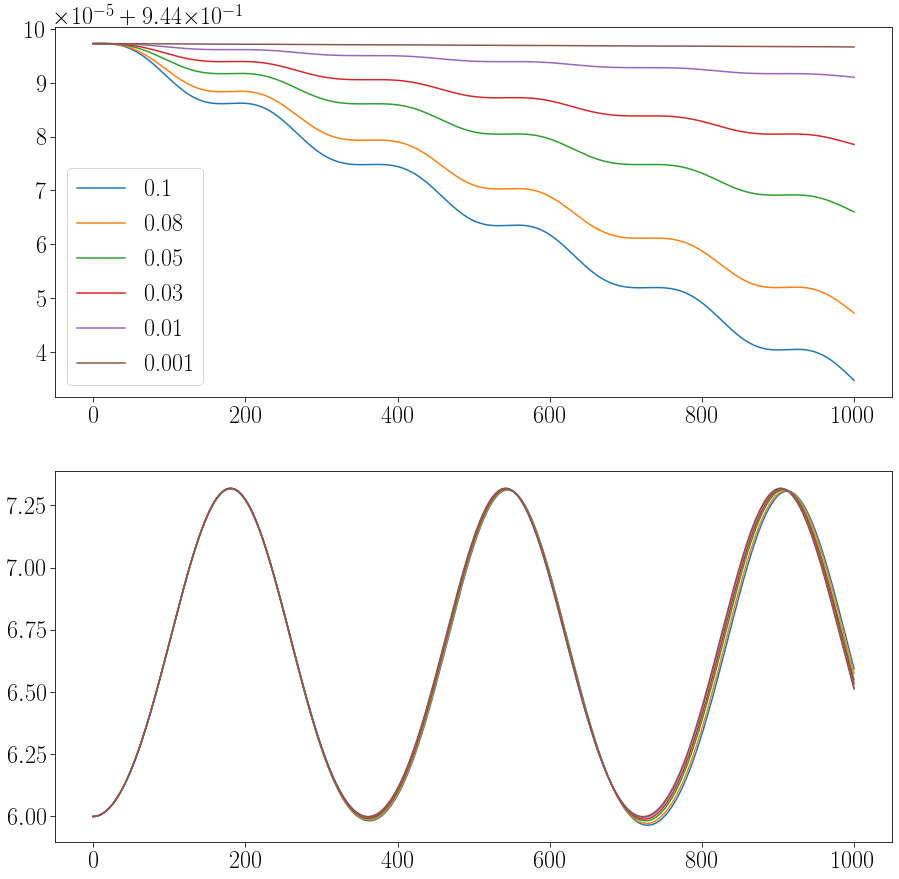

In [17]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

# c = 0
# for integrator in integrators.values():
#     E = integrator.get_system_energy() 
#     if E[0] > c:
#         c = E[0]

#f = c * np.log( -0.01 * t_array)

#f = c * (1 - np.sqrt(t_array))

for dt, integrator in integrators.items():
    # if dt == "0.1":
    #     continue
    axs[0].plot(np.append(integrator.t_array, t_end), integrator.get_system_energy(), label=dt)
    #axs[0].plot(integrator.obs[:,2], integrator.get_system_energy(), label=dt)
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.obs[:,2], label=dt)
    axs[1].plot(np.append(integrator.t_array, t_end), integrator.obs[:,0], label=dt)
    #axs[1].plot(integrator.obs[:,0]*np.cos(integrator.obs[:,2]), integrator.obs[:,0]*np.sin(integrator.obs[:,2]), label=dt)
# ax.plot(t_array, f)

axs[0].legend()

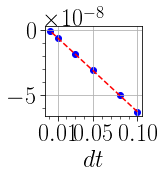

In [15]:
## INvestigating slope dependence
fig, ax = plt.subplots(1,1, figsize=(3,3))

dts = []
ks = []

for dt_str, integrator in integrators.items():
    dt = float(dt_str)
    reg_result = stats.linregress(np.append(integrator.t_array, t_end), integrator.get_system_energy())
    ax.scatter(dt, reg_result.slope, label=dt, c="blue")
    
    dts.append(dt)
    ks.append(reg_result.slope)
    
#reg_result = stats.linregress(dts, ks)

ax.plot([dts[0], dts[-1]], [ks[0], ks[-1]], "--r")

#ax.grid()

generate_figure_loc(ax, fig, "figures/energy_conservation_euler_method.png")
    

# ax.legend()

# fig.savefig("report/figures/energy_conservation_euler_method.png", dpi=1000)

## RK4

In [8]:
rk4_integrators = {}

#for dt in [0.1, 0.08, 0.05, 0.03, 0.01, 0.001]:
for dt in [0.1, 0.08, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.005, 0.003, 0.001]:
    rk4_integrator = Rk4Integrator(initial_conditions, dt, t_end, t_start, M)
    rk4_integrator.run_simulation()
    rk4_integrators[str(dt)] = rk4_integrator
    t_array = np.append(rk4_integrator.t_array, t_end)
    # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")

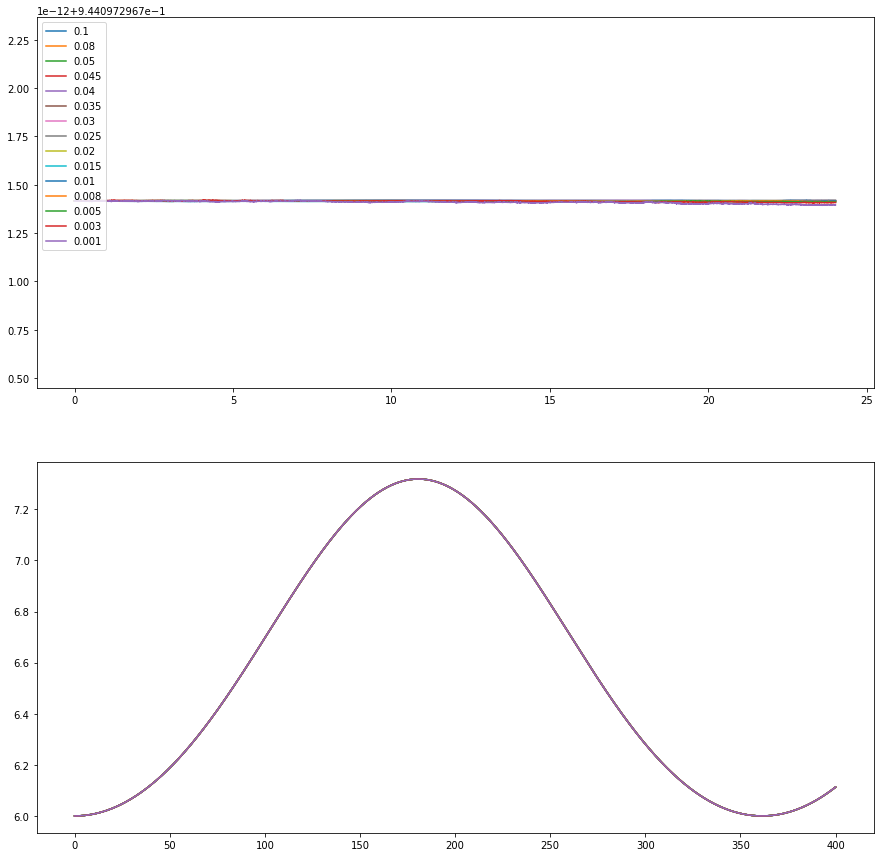

In [19]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

t = 100

for dt, integrator in rk4_integrators.items():
    # if dt == "0.1":
    #     continue
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.get_system_energy(), label=dt)
    axs[0].plot(integrator.obs[:,2], integrator.get_system_energy(), label=dt)
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.obs[:,2], label=dt)
    axs[1].plot(np.append(integrator.t_array, t_end), integrator.obs[:,0], label=dt)
    #axs[1].plot(integrator.obs[:,0]*np.cos(integrator.obs[:,2]), integrator.obs[:,0]*np.sin(integrator.obs[:,2]), label=dt)
# ax.plot(t_array, f)

axs[0].legend()

In [51]:
from utils import generate_figure

ImportError: cannot import name 'generate_figure'

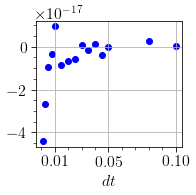

In [132]:
## INvestigating slope dependence
fig, ax = plt.subplots(1,1, figsize=(3,3))

dts = []
ks = []

for dt_str, integrator in rk4_integrators.items():
    dt = float(dt_str)
    reg_result = stats.linregress(np.append(integrator.t_array, t_end), integrator.get_system_energy())
    ax.scatter(dt, reg_result.slope, label=dt, c="blue")
    
    dts.append(dt)
    ks.append(reg_result.slope)


generate_figure_loc(ax, fig, "figures/energy_conservation_rk4.png")

# ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.grid()
# #ax.legend()

# ax.set_xlabel("$dt$")
# ax.set_ylabel("System energy trend slope")

# ax.ticklabel_format(style='sci')

# # ax.set_xticks(np.arange(0, 0.11, 0.025))

# plt.show()

# fig.savefig("report/figures/energy_conservation_rk4.png", dpi=1000)


## Euler back

In [13]:
euler_back_integrators = {}

#for dt in [0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01, 0.008, 0.005, 0.003, 0.001]:
for dt in [0.003, 0.001]:
    euler_back_integrator = BackEuler(initial_conditions, dt, t_end, t_start, M)
    euler_back_integrator.run_simulation()
    euler_back_integrators[str(dt)] = euler_back_integrator
    with open("integrators_objects/euler_back_long"+str(dt), "wb") as f:
        pickle.dump(euler_back_integrator, f)
        
    t_array = np.append(euler_back_integrator.t_array, t_end)
    # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")

KeyboardInterrupt: 

TODO: add back $dt = 0.001$ integrator

In [127]:
euler_back_integrator = BackEuler(initial_conditions, 0.5, t_end, t_start, M)
euler_back_integrator.run_simulation()
euler_back_integrators["0.5"] = euler_back_integrator
dt

'0.001'

/home/axel/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/axel/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


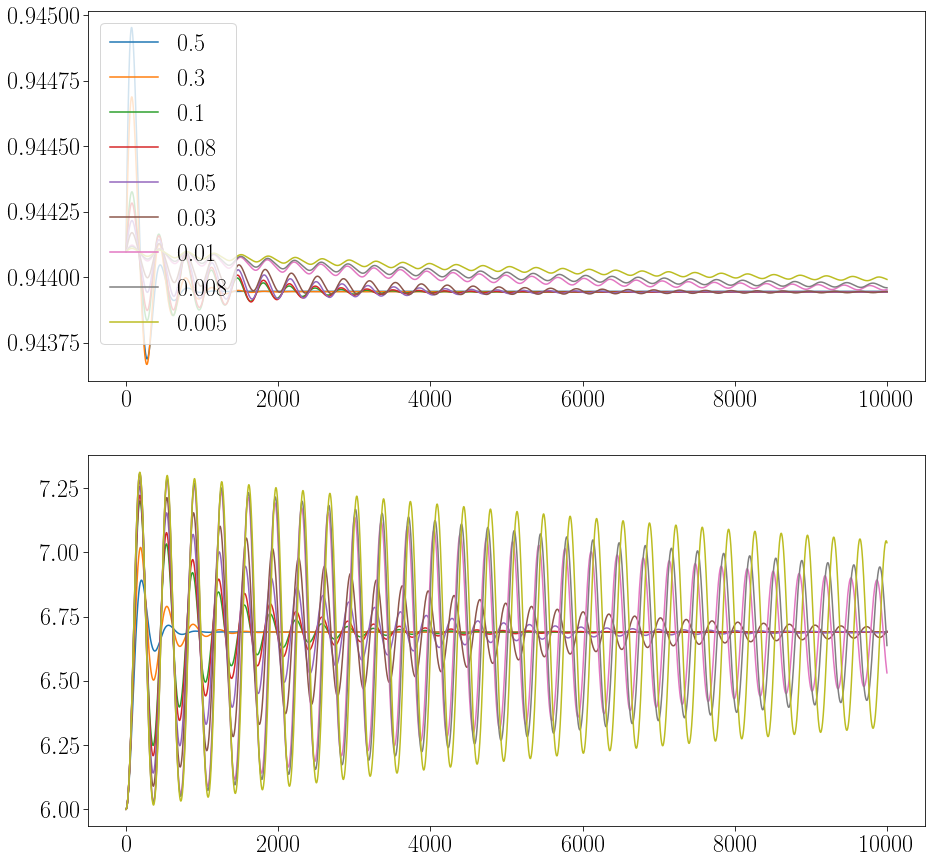

In [144]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

# fetch integrators from integrators_objects

for dt, integrator in euler_back_integrators.items():
    # if dt == "0.1":
    #     continue
    axs[0].plot(np.append(integrator.t_array, t_end), integrator.get_system_energy(), label=dt)
    #axs[0].plot(integrator.obs[:,2], integrator.get_system_energy(), label=dt)
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.obs[:,2], label=dt)
    axs[1].plot(np.append(integrator.t_array, t_end), integrator.obs[:,0], label=dt)
    #axs[1].plot(integrator.obs[:,0]*np.cos(integrator.obs[:,2]), integrator.obs[:,0]*np.sin(integrator.obs[:,2]), label=dt)
# ax.plot(t_array, f)

axs[0].legend()

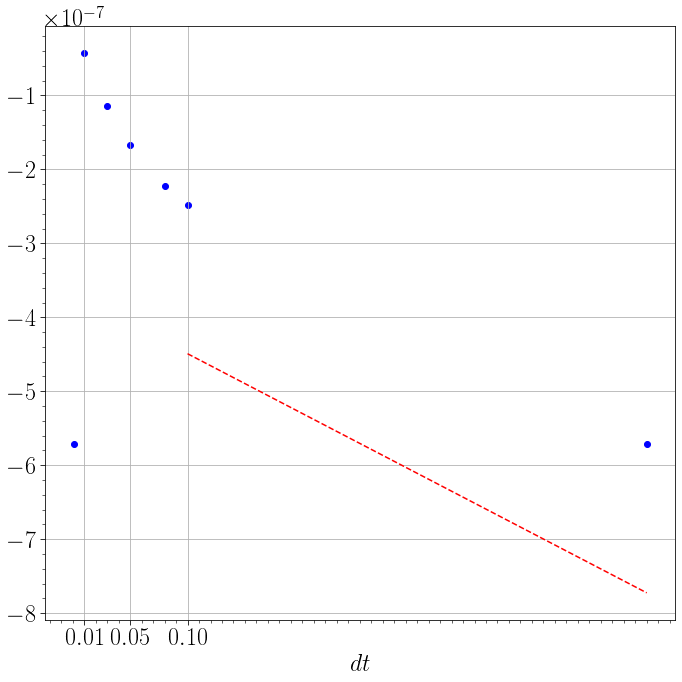

In [136]:
## INvestigating slope dependence
fig, ax = plt.subplots(1,1, figsize=(10,10))

dts = []
ks = []
ms = []

for dt_str, integrator in euler_back_integrators.items():
    dt = float(dt_str)
    reg_result = stats.linregress(np.append(integrator.t_array, t_end), integrator.get_system_energy())
    ax.scatter(dt, reg_result.slope, label=dt, c="blue")
    
    dts.append(dt)
    ks.append(reg_result.slope)
    ms.append(reg_result.intercept)
    
regreg_result = stats.linregress(dts, ks)    

ax.plot([dts[0], dts[-1]], [ks[0] + regreg_result.intercept, ks[-1] + regreg_result.intercept], "--r")

generate_figure_loc(ax, fig, "figures/energy_conservation_euler_back.png")


In [66]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

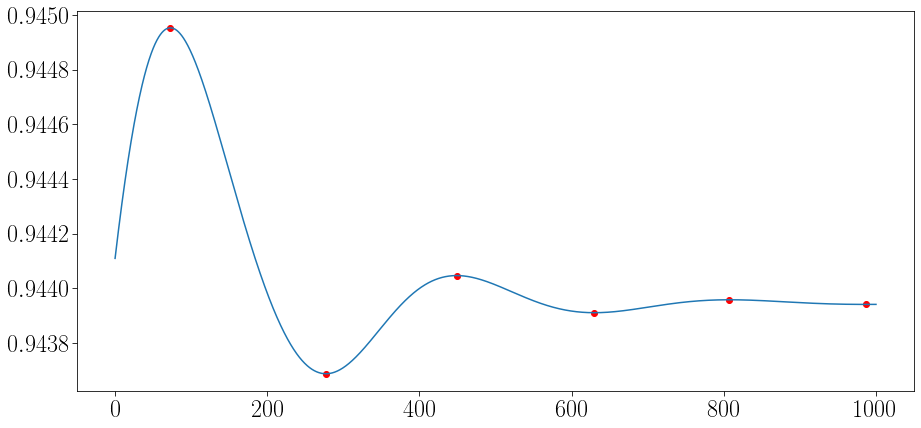

In [128]:
integrator = euler_back_integrators['0.5']

E = integrator.get_system_energy()

find_peaks(E)
t_arr = np.append(integrator.t_array, t_end)

fig, ax = plt.subplots(1,1, figsize=(15,7))
ax.plot(t_arr, integrator.get_system_energy(), label=dt)

for ind in [find_peaks(-E)[0], find_peaks(E)[0]]:
    ax.scatter(t_arr[ind], E[ind], c="red")

In [129]:
tops = np.array([[t_arr[ind], E[ind]] for ind in find_peaks(E)[0]])
valleys = np.array([[t_arr[ind], E[ind]] for ind in find_peaks(-E)[0]])

p0 = (0.95,  -.01, 0.94)
popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(-b * t) + c, valleys[:,0], valleys[:,1])
#popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(-b * t) + c, tops[:,0], tops[:,1])

a = popt[0]
b = popt[1]
c = popt[2]


x_fitted = np.linspace(0, 1000, 10000)
E_fitted = a * np.exp(-b * x_fitted) + c
b

/home/axel/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.0

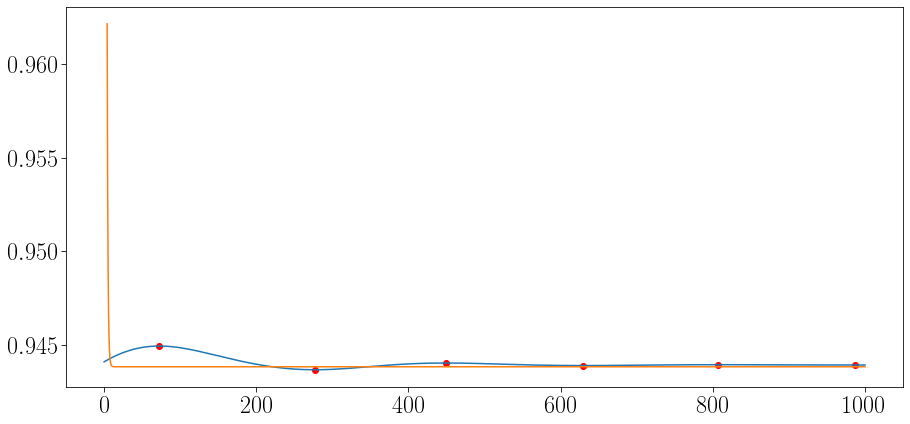

In [134]:
#integrator = euler_back_integrators['0.1']

E = integrator.get_system_energy()

find_peaks(E)
t_arr = np.append(integrator.t_array, t_end)

fig, ax = plt.subplots(1,1, figsize=(15,7))
ax.plot(t_arr, integrator.get_system_energy(), label=dt)

for ind in [find_peaks(-E)[0], find_peaks(E)[0]]:
    ax.scatter(t_arr[ind], E[ind], c="red")
    
ax.plot(x_fitted[40:],E_fitted[40:])

plt.show()